In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from tpot import TPOTClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve
from xgboost.sklearn import XGBClassifier
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

C:\Users\varma\Anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
# loading data
train = pd.read_csv('training_.csv')
test = pd.read_csv('test.csv')


In [3]:
# getting first 5 train data
train.head(5)



,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# getting first 5 test data
test.head(5)


,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-29 11:32:22,39,Male,United Kingdom,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,Yes,These result may be a tad confusing so a summa...
1,2,2014-08-29 11:32:44,26,female,United States,WA,No,Yes,Sometimes,More than 1000,...,Don't know,No,No,Some of them,Yes,No,Maybe,No,Yes,I should note one of the places my employer fa...
2,3,2014-08-29 11:33:54,23,Female,United States,IL,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,No,No,NaN
3,4,2014-08-29 11:34:07,35,Male,Switzerland,NaN,No,Yes,Often,More than 1000,...,Very easy,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
4,5,2014-08-29 11:36:38,36,Male,United States,FL,No,No,Never,1-5,...,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN


 %% [markdown]

In [5]:
print(train.info())
print(test.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1048 non-null   object
 14  care_opt

 We have 1048 train data and 210 test data.
 There are only 2 numeric columns.
 Also there are null values in some columns

In [6]:
# removing non required columns
train.drop(['S.No', 'Timestamp'], axis=1, inplace=True)
test.drop(['S.No', 'Timestamp'], axis=1, inplace=True)

train.head()


,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
# checking null counts
print(train.isnull().sum())
print(test.isnull().sum())



Age                            0
Gender                         0
Country                        0
state                        412
self_employed                 18
family_history                 0
treatment                      0
work_interfere               236
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     916
dtype: int64
Age                            0
Gender                         0
Country                        0
state                        1

In [8]:
# checking percentage null
print(train.isnull().sum()/train.isnull().count()*100)
print(test.isnull().sum()/test.isnull().count()*100)


Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        39.312977
self_employed                 1.717557
family_history                0.000000
treatment                     0.000000
work_interfere               22.519084
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence               0.000000
comments                 

 we see that attributes state, self_employed,work-interface,comments have null values

treatment  No  Yes
state             
AL          1    3
AZ          1    6
CA         49   74
CO          5    4
CT          2    2
DC          3    1
FL          4    6
GA          6    6
IA          1    3
ID          0    1
IL          5   16
IN         11    9
KS          3    0
KY          4    1
LA          0    1
MA         10   10
MD          6    1
ME          0    1
MI         11    8
MN          9    8
MO          8    4
MS          0    1
NC          5    5
NE          1    1
NH          1    2
NJ          2    1
NM          2    0
NV          1    2
NY         22   27
OH          6   18
OK          3    2
OR         10   16
PA         14   12
RI          1    0
SC          3    1
SD          2    1
TN         26   13
TX         18   20
UT          3    3
VA          8    4
VT          2    0
WA         27   33
WI          2    8
WV          1    0
WY          1    1


<AxesSubplot:xlabel='state'>

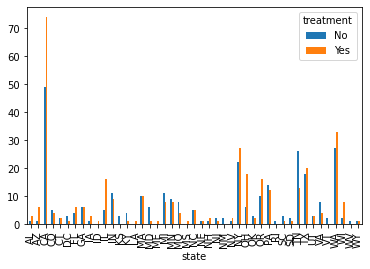

In [9]:
# starting with state columns
tab = pd.crosstab(train.state, train.treatment)
print(tab)
tab.plot(kind='bar')


 From graph we do not find any particular correlation between state and treatment.
 Also since there are approx 40% null values in train and 49% in test  we can drop the State column

In [10]:
# dropping state column
train.drop('state', axis=1, inplace=True)
test.drop('state', axis=1, inplace=True)


No     906
Yes    124
Name: self_employed, dtype: int64


<AxesSubplot:xlabel='self_employed'>

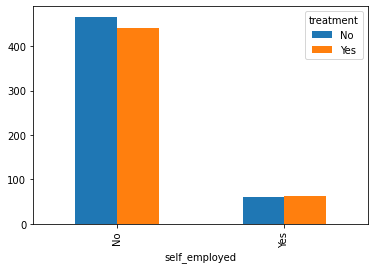

In [11]:
# checking null values in self_employed
print(train.self_employed.value_counts())
pd.crosstab(train.self_employed, train.treatment).plot(kind='bar')


In [12]:
# target variable seems to show some relation with self_employed.
# therefore for first iteratiom let us impute it with mode
train['self_employed'].fillna(train['self_employed'].mode()[0], inplace=True)
test['self_employed'].fillna(test['self_employed'].mode()[0], inplace=True)


Sometimes    386
Never        178
Rarely       144
Often        104
Name: work_interfere, dtype: int64


<AxesSubplot:xlabel='work_interfere'>

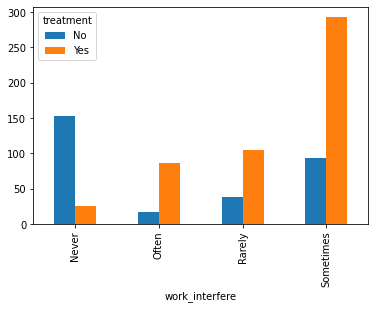

In [13]:
print(train.work_interfere.value_counts())
pd.crosstab(train.work_interfere, train.treatment).plot(kind='bar')


 let's consider mode as replacement for null values
 later on we will remove the column

In [14]:
# replace null values with mode
train['work_interfere'].fillna(train['work_interfere'].mode()[0], inplace=True)
test['work_interfere'].fillna(test['work_interfere'].mode()[0], inplace=True)


In [15]:
# Since comments has 87.7% null values. Therefore removing that column
train.drop('comments', axis=1, inplace=True)
test.drop('comments', axis=1, inplace=True)


In [16]:
# checking for outliers in age numeric column
# sns.boxplot('Age',data=data)
print(train.Age.unique())
print(test.Age.unique())


[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8]
[39 26 23 35 36 42 27 33 31 28 29 44 25 24 34 48 43 41 40 37 32 30 38 11
 45 50 46 20 -1 21 51 72 56 60 22]


 We see that some values are negative while some values are above 300.
 therefore removing those values with mode

In [17]:
train.Age[(train.Age < 0) | (train.Age > 300)] = train.Age.mode()[0]
test.Age[(test.Age < 0) | (test.Age > 300)] = test.Age.mode()[0]


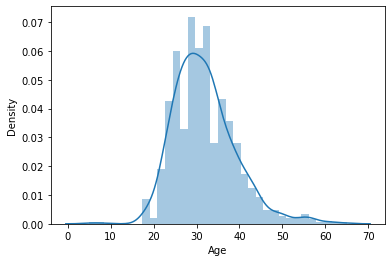

<AxesSubplot:xlabel='Age', ylabel='Density'>

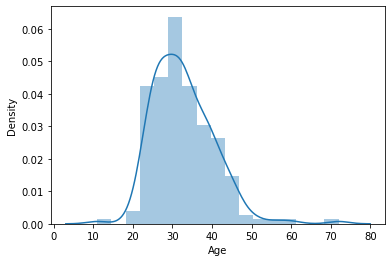

In [18]:
sns.distplot(train.Age)
plt.show()
sns.distplot(test.Age)


 we see that Age column is approximately normally distributed

 Gender column

In [19]:
print(train.Gender.unique())
print(test.Gender.unique())


['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr']
['Male' 'female' 'Female' 'M' 'male' 'Male ' 'm' 'p' 'F' 'Woman' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means' 'f']


treatment                  No  Yes
Gender                            
A little about you          0    1
Agender                     0    1
All                         0    1
Androgyne                   0    1
Cis Female                  0    1
Cis Male                    0    2
Enby                        0    1
F                          11   22
Femake                      1    0
Female                     31   68
Female                      1    1
Female (cis)                1    0
Female (trans)              0    2
Genderqueer                 1    0
Guy (-ish) ^_^              0    1
M                          60   40
Mail                        1    0
Make                        1    3
Mal                         1    0
Male                      291  227
Male                        0    1
Male (CIS)                  1    0
Male-ish                    0    1
Malr                        0    1
Man                         2    0
Nah                         0    1
Neuter              

<AxesSubplot:xlabel='Gender'>

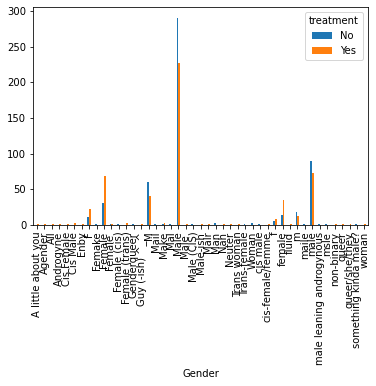

In [20]:
tab = pd.crosstab(train.Gender, train.treatment)
print(tab)
tab.plot(kind='bar')

 replacing M,m,Male,maile,Cis Male,
 Mal,Male (CIS),Make,Male ,Man,msle,Mail,cis male,Malr  with male
 And Female,Cis Female,F,Woman,f,Femake,woman,Female ,cis-female/femme,
 Female (cis) as female
 And rest all genders as other

In [21]:
male = ['M', 'm', 'Male', 'Male-ish', 'maile', 'Cis Male', 'Mal',
        'Male (CIS)', 'Make', 'Male ', 'Man', 'msle', 'Mail', 'cis male',
        'Malr', 'Cis Man', 'something kinda male?', 'Guy (-ish) ^_^',
        'male leaning androgynous', 'ostensibly male, unsure what that really means']
female = ['Female', 'Cis Female', 'F', 'Woman', 'f', 'Femake',
          'woman', 'Female ', 'cis-female/femme', 'Female (cis)', 'femail',
          'Trans-female', 'Trans woman', 'Female (trans)']


In [22]:
# replacing train Gender values
train.Gender.replace(male, 'male', inplace=True)
train.Gender.replace(female, 'female', inplace=True)
train.Gender[(train.Gender != 'male') & (train.Gender != 'female')] = 'others'

# replacing test Gender values
test.Gender.replace(male, 'male', inplace=True)
test.Gender.replace(female, 'female', inplace=True)
test.Gender[(test.Gender != 'male') & (test.Gender != 'female')] = 'others'


treatment   No  Yes
Gender             
female      66  140
male       469  361
others       1   11


<AxesSubplot:xlabel='Gender'>

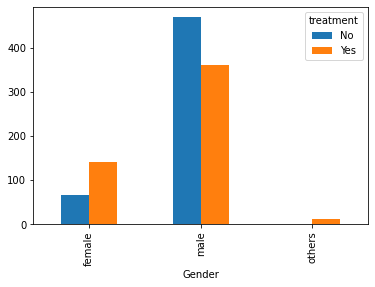

In [23]:
# plotting train with y variable
tab = pd.crosstab(train.Gender, train.treatment)
print(tab)
tab.plot(kind='bar')


In [24]:
# segregating target variable
target = train.pop('treatment')
target.replace('Yes', 1, inplace=True)
target.replace('No', 0, inplace=True)
target.value_counts()

0    536
1    512
Name: treatment, dtype: int64

In [25]:
# segregating numeric and categorical values
train_num = train.select_dtypes(exclude='object')
train_cat = train.select_dtypes(include='object')

test_num = test.select_dtypes(exclude='object')
test_cat = test.select_dtypes(include='object')


In [26]:
# Since Country unique in train and test are different.
# We one hot encode them separately
train_country = train_cat.pop('Country')
test_country = test_cat.pop('Country')


In [27]:
s1 = set(train_country.unique())
s2 = set(test_country.unique())
print(s1-s2)
print(s2-s1)


{'Romania', 'Hungary', 'Spain', 'Nigeria', 'Latvia', 'Denmark', 'Bosnia and Herzegovina', 'Uruguay', 'Costa Rica', 'Austria', 'Mexico', 'Zimbabwe', 'Japan', 'Bahamas, The', 'Norway', 'Thailand', 'Portugal', 'Slovenia', 'Russia'}
{'Moldova', 'Czech Republic', 'Greece', 'Georgia', 'Philippines', 'China'}


In [1]:
 # we see that there are some values in train which are not in test
 # also there are some values which are in test but not in train
 # therefore we first concatenate train and test.
 # Then we do one hot encoding and slplit them again
 # # country = pd.concat([train_country, test_country], axis=0, ignore_index=True)
 # # country.reset_index
 # # country_dummy = pd.get_dummies(country, drop_first=True)
 # # country_dummy_train = country_dummy.loc[:1047, :]
 # # print(country_dummy_train.shape)
 # # country_dummy_train.head()

In [28]:
# country_dummy_test = country_dummy.loc[1048:, :]
# print(country_dummy_test.shape)
# country_dummy_test.reset_index(inplace=True, drop=True)
# country_dummy_test.head()
# # from sklearn.preprocessing import  LabelEncoder
# # labelencoder=LabelEncoder()
# # A=labelencoder.fit_transform(train_country)
# # B=labelencoder.transform(test_country)


In [29]:
train_No_employees = train_cat.pop('no_employees')
test_No_employees = test_cat.pop('no_employees')
print(train_No_employees.unique())
print(test_No_employees.unique())

['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
['1-5' 'More than 1000' '26-100' '500-1000' '6-25' '100-500']


In [30]:
# Label encoding values for no_employees

train_No_employees.replace('1-5', 0, inplace=True)
train_No_employees.replace('6-25', 1, inplace=True)
train_No_employees.replace('26-100', 2, inplace=True)
train_No_employees.replace('100-500', 3, inplace=True)
train_No_employees.replace('500-1000', 4, inplace=True)
train_No_employees.replace('More than 1000', 5, inplace=True)
print(train_No_employees.unique())

test_No_employees.replace('1-5', 0, inplace=True)
test_No_employees.replace('6-25', 1, inplace=True)
test_No_employees.replace('26-100', 2, inplace=True)
test_No_employees.replace('100-500', 3, inplace=True)
test_No_employees.replace('500-1000', 4, inplace=True)
test_No_employees.replace('More than 1000', 5, inplace=True)
print(test_No_employees.unique())


[1 5 2 3 0 4]
[0 5 2 4 1 3]


In [31]:
train_leave = train_cat.pop('leave')
test_leave = test_cat.pop('leave')
print(train_leave.unique())
print(test_leave.unique())


['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
['Somewhat difficult' "Don't know" 'Very easy' 'Somewhat easy'
 'Very difficult']


In [32]:
# Label encoding values for leave

train_leave.replace('Very easy', 0, inplace=True)
train_leave.replace('Somewhat easy', 1, inplace=True)
train_leave.replace("Don't know", 2, inplace=True)
train_leave.replace('Somewhat difficult', 3, inplace=True)
train_leave.replace('Very difficult', 4, inplace=True)
print(train_leave.unique())

test_leave.replace('Very easy', 0, inplace=True)
test_leave.replace('Somewhat easy', 1, inplace=True)
test_leave.replace("Don't know", 2, inplace=True)
test_leave.replace('Somewhat difficult', 3, inplace=True)
test_leave.replace('Very difficult', 4, inplace=True)
print(test_leave.unique())


[1 2 3 4 0]
[3 2 0 1 4]


In [33]:
label_train = pd.DataFrame({'no_employees': train_No_employees,
                            'leave': train_leave})
label_test = pd.DataFrame({'no_employees': test_No_employees,
                           'leave': test_leave})


In [34]:
# one hot encoding
train_dummy = pd.get_dummies(train_cat, drop_first=True)
test_dummy = pd.get_dummies(test_cat, drop_first=True)


In [35]:
# concartenating the datasets again
train_new = pd.concat([train_num, train_dummy, label_train], axis=1)
test_new = pd.concat([test_num, test_dummy, label_test], axis=1)
print(train_new.shape)
print(test_new.shape)



(1048, 37)
(210, 37)


In [36]:
# splitting the dataset

trainx, validationx, trainy, validationy = train_test_split(
    train_new, target, test_size=0.2)
print(trainx.shape)
print(validationx.shape)
print(trainy.shape)
print(validationy.shape)


(1042, 37)
(6, 37)
(1042,)
(6,)


In [37]:
# scaling the data and trying again
sc = StandardScaler()
trainx.loc[:, 'Age'] = sc.fit_transform(
    np.array(trainx.loc[:, 'Age']).reshape(-1, 1))

In [38]:
validationx.loc[:, 'Age'] = sc.transform(
    np.array(validationx.loc[:, 'Age']).reshape(-1, 1))
# validationx['Age']=sc.transform(validationx['Age'])
test_new.loc[:, 'Age'] = sc.transform(
    np.array(test_new.loc[:, 'Age']).reshape(-1, 1))

In [39]:
# we define functions for all models with do cross validation and
# automatically select best parameters

#defining random forest model

def rf_cross_val(trainx, trainy):
    # using cross validation
    n_estimators = [25, 50, 75, 100, 150, 200, 250, 300]
    criterion = ['gini', 'entropy']
    min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8]
    min_samples_split = [2, 3, 4, 5, 6, 6, 7, 8]
    min_weight_fraction_leaf = [0, 0.01, 0.25, 0.05, 0.75, 0.1, 0.5]
    grid = {'n_estimators': n_estimators, 'criterion': criterion,
            'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split,
            'min_weight_fraction_leaf': min_weight_fraction_leaf}

    cross_val = RandomizedSearchCV(RandomForestClassifier(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_

    rf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                min_weight_fraction_leaf=best_params['min_weight_fraction_leaf'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'],
                                criterion=best_params['criterion']).fit(trainx, trainy)
    return rf


In [40]:
#defining decision tree model
def dt_cross_val(trainx, trainy):
    # using cross validation
    criterion = ['gini', 'entropy']
    splitter = ['best', 'random']
    min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8]
    min_samples_split = [2, 3, 4, 5, 6, 6, 7, 8]
    min_weight_fraction_leaf = [0, 0.01, 0.25, 0.05, 0.75, 0.1, 0.5]
    ccp_alpha = [0, 0.01, 0.025, 0.05, 0.1]
    grid = {'splitter': splitter, 'criterion': criterion,
            'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split,
            'min_weight_fraction_leaf': min_weight_fraction_leaf,
            'ccp_alpha': ccp_alpha}

    cross_val = RandomizedSearchCV(DecisionTreeClassifier(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_

    df = DecisionTreeClassifier(splitter=best_params['splitter'],
                                min_weight_fraction_leaf=best_params['min_weight_fraction_leaf'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'],
                                criterion=best_params['criterion'],
                                ccp_alpha=best_params['ccp_alpha']).fit(trainx, trainy)
    return df


In [41]:
# defining knn model
def knn_cross_val(trainx, trainy):
    # using cross validation
    n_neighbors = range(3, 12, 2)
    weights = ['uniform', 'distance']
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
    metric = ['minkowski', 'euclidean', 'manhatten']
    leaf_size = [10, 20, 30, 40, 50, 60, 70]
    grid = {'n_neighbors': n_neighbors, 'weights': weights,
            'algorithm': algorithm, 'metric': metric,
            'leaf_size': leaf_size}

    cross_val = RandomizedSearchCV(KNeighborsClassifier(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_

    knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                               weights=best_params['weights'],
                               algorithm=best_params['algorithm'],
                               metric=best_params['metric'],
                               leaf_size=best_params['leaf_size']).fit(trainx, trainy)
    return knn


In [42]:
# defining svm model

def svm_cross_val(trainx, trainy):
    # using cross validation
    C = [0.01, 0.05, 0.1, 0.25, 0.5, 1]
    penalty = ['l1', 'l2']
    loss = ['hinged', 'squared_hinge']
    max_iter = [1000, 2500, 5000]
    grid = {'penalty': penalty, 'C': C,
            'loss': loss, 'max_iter': max_iter}

    cross_val = RandomizedSearchCV(svm.LinearSVC(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_

    svc = svm.LinearSVC(penalty=best_params['penalty'],
                        C=best_params['C'],
                        loss=best_params['loss'],
                        max_iter=best_params['max_iter']).fit(trainx, trainy)
    return svc


In [43]:
# defining adaboost model

def ada_cross_val(trainx, trainy):
    # using cross validation
    base_estimator = [DecisionTreeClassifier(
        max_depth=1), RandomForestClassifier(max_depth=1)]
    n_estimators = [30, 50, 70, 100, 125, 150]
    learning_rate = [0.01, 0.02, 0.05, 0.1, 0.5, 1]
    algorithm = ['SAMME', 'SAMME.R']
    grid = {'base_estimator': base_estimator, 'n_estimators': n_estimators,
            'learning_rate': learning_rate, 'algorithm': algorithm}

    cross_val = RandomizedSearchCV(AdaBoostClassifier(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_

    ada = AdaBoostClassifier(base_estimator=best_params['base_estimator'],
                             n_estimators=best_params['n_estimators'],
                             learning_rate=best_params['learning_rate'],
                             algorithm=best_params['algorithm']).fit(trainx, trainy)
    return ada


In [44]:
# defining gradient boost model

def gradient_cross_val(trainx, trainy):
    # using cross validation
    n_estimators = [10, 25, 50, 75, 100, 150, 200, 250]
    min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8]
    min_samples_split = [2, 3, 4, 5, 6, 6, 7, 8]
    min_weight_fraction_leaf = [0, 0.01, 0.25, 0.05, 0.75, 0.1, 0.5]
    grid = {'n_estimators': n_estimators,
            'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split,
            'min_weight_fraction_leaf': min_weight_fraction_leaf}

    cross_val = RandomizedSearchCV(GradientBoostingClassifier(), grid, cv=5,
                                   scoring='accuracy').fit(trainx, trainy)
    best_params = cross_val.best_params_

    gradient = GradientBoostingClassifier(n_estimators=best_params['n_estimators'],
                                          min_weight_fraction_leaf=best_params['min_weight_fraction_leaf'],
                                          min_samples_split=best_params['min_samples_split'],
                                          min_samples_leaf=best_params['min_samples_leaf'],).fit(trainx, trainy)
    return gradient



In [45]:
# Building a function that will run all models

def run_model(trainx, trainy):

    # decision Tree Model
    model_dt = dt_cross_val(trainx, trainy)

    # Random forest Model
    model_rf = rf_cross_val(trainx, trainy)
    # knn forest Model
    model_knn = knn_cross_val(trainx, trainy)
    # svm Model
    model_svm = svm_cross_val(trainx, trainy)
    # gradient boost Model
    model_gradient = gradient_cross_val(trainx, trainy)
    # Adaboost Model
    # using 1 features i.e 1 stump for Adaboost

    model_ada = ada_cross_val(trainx, trainy)

    # XGBoost Model
    model_xgb = xgb.XGBClassifier(n_estimators=100).fit(trainx, trainy)
    model_vc = VotingClassifier(estimators=[('dt', model_dt), ('rf', model_rf),
                                            ('knn', model_knn), ('svm', model_svm),
                                            ('gradient',
                                             model_gradient), ('ada', model_ada),
                                            ('xgb', model_xgb)], voting='hard').fit(trainx, trainy)
    
    return [model_dt, model_rf, model_knn, model_svm, model_gradient, model_ada, model_xgb, model_vc]



In [46]:

# building funtion to plot ROC AUC curve and get metrics
def get_results(model, testx, testy):
    # unpacking the models
    model_dt, model_rf, model_knn, model_svm, model_gradient, model_ada, model_xgb, model_vc = model

    # predicting the values
    p_dt = model_dt.predict(testx)
    p_rf = model_rf.predict(testx)
    p_knn = model_knn.predict(testx)
    p_svm = model_svm.predict(testx)
    p_gradient = model_gradient.predict(testx)
    p_ada = model_ada.predict(testx)
    p_xgb = model_xgb.predict(testx)
    p_vc = model_vc.predict(testx)

    # creating lists to store result
    model_name = np.array(['Decision Tree', 'Random Forest', 'knn',
                           'svm', 'Gradientb', 'Adaboost', 'XGBoost', 'Voting'])

    accuracy = np.round(np.array([accuracy_score(testy, p_dt), accuracy_score(testy, p_rf),
                                  accuracy_score(testy, p_knn), accuracy_score(testy, p_svm),
                                  accuracy_score(testy, p_gradient), accuracy_score(testy, p_ada),
                                  accuracy_score(testy, p_xgb),accuracy_score(testy, p_vc)]), 2)

    f1score = np.round(np.array([f1_score(testy, p_dt), f1_score(testy, p_rf),
                                 f1_score(testy, p_knn), f1_score(testy, p_svm),
                                 f1_score(testy, p_gradient),f1_score(testy, p_ada),
                                 f1_score(testy, p_xgb),f1_score(testy, p_vc)]), 2)

    # unpacking fpr,tpr
    fpr_dt, tpr_dt, thres_dt = roc_curve(testy, p_dt)
    fpr_rf, tpr_rf, thres_rd = roc_curve(testy, p_rf)
    fpr_knn, tpr_knn, thres_rd = roc_curve(testy, p_knn)
    fpr_svm, tpr_svm, thres_rd = roc_curve(testy, p_svm)
    fpr_gradient, tpr_gradient, thres_ada = roc_curve(testy, p_gradient)
    fpr_ada, tpr_ada, thres_rd = roc_curve(testy, p_ada)
    fpr_xgb, tpr_xgb, thres_xgb = roc_curve(testy, p_xgb)
    fpr_vc, tpr_vc, thres_xgb = roc_curve(testy, p_vc)

    # getting auc
    auc_dt = np.round(auc(fpr_dt, tpr_dt), 2)
    auc_rf = np.round(auc(fpr_rf, tpr_rf), 2)
    auc_knn = np.round(auc(fpr_knn, tpr_knn), 2)
    auc_svm = np.round(auc(fpr_svm, tpr_svm), 2)
    auc_gradient = np.round(auc(fpr_gradient, tpr_gradient), 2)
    auc_ada = np.round(auc(fpr_ada, tpr_ada), 2)
    auc_xgb = np.round(auc(fpr_xgb, tpr_xgb), 2)
    auc_vc = np.round(auc(fpr_vc, tpr_vc), 2)
    roc_auc = np.array([auc_dt, auc_rf, auc_knn,auc_svm, auc_gradient, auc_ada, auc_xgb,auc_vc])

    # getting the tpr for roc_curve which is sensitivity
    sensitivity = np.round(np.array([tpr_dt[1], tpr_rf[1], tpr_knn[1], tpr_svm[1],
                             tpr_gradient[1], tpr_ada[1], tpr_xgb[1],tpr_vc[1]]), 2)
    # getting the fpr and subtracting from 1 to get specificity
    specificity = np.round(np.array([1-fpr_dt[1], 1-fpr_rf[1], 1-fpr_knn[1], 1-fpr_svm[1],
                             1-fpr_gradient[1], 1-fpr_ada[1], 1-fpr_xgb[1],1-fpr_vc[1]]), 2)
    results = pd.DataFrame({'model': model_name, 'accuracy': accuracy, 'f1_score': f1score,
                            'sensitivity': sensitivity, 'specificity': specificity, 'ROC': roc_auc})

    # plotting ROC AUC
    plt.figure(figsize=(15, 7))
    plt.plot(fpr_dt, tpr_dt, label='Decision Tree AUC: %0.2f' % auc_dt)
    plt.plot(fpr_rf, tpr_rf, label='Random Forest AUC: %0.2f' % auc_rf)
    plt.plot(fpr_knn, tpr_knn, label='knn AUC: %0.2f' % auc_knn)
    plt.plot(fpr_svm, tpr_svm, label='svm AUC: %0.2f' % auc_svm)
    plt.plot(fpr_gradient, tpr_gradient,label='Gradient AUC: %0.2f' % auc_gradient)
    plt.plot(fpr_ada, tpr_ada, label='AdaBoost AUC: %0.2f' % auc_ada)
    plt.plot(fpr_xgb, tpr_xgb, label='XGBoost AUC: %0.2f' % auc_xgb)
    plt.plot(fpr_vc, tpr_vc, label='Voting AUC: %0.2f' % auc_vc)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC curve')
    plt.legend()
    plt.show()

    return results


In [47]:
# creating submission file

def create_submission(predict, filename):
    d = {'S.No ': np.arange(1, 211), 'treatment': predict}
    submission = pd.DataFrame(d)
    submission.treatment.replace(1, 'Yes', inplace=True)
    submission.treatment.replace(0, 'No', inplace=True)
    submission.to_csv(filename, index=False)



In [48]:
# running all models
model = run_model(trainx, trainy)


[20:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:37:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


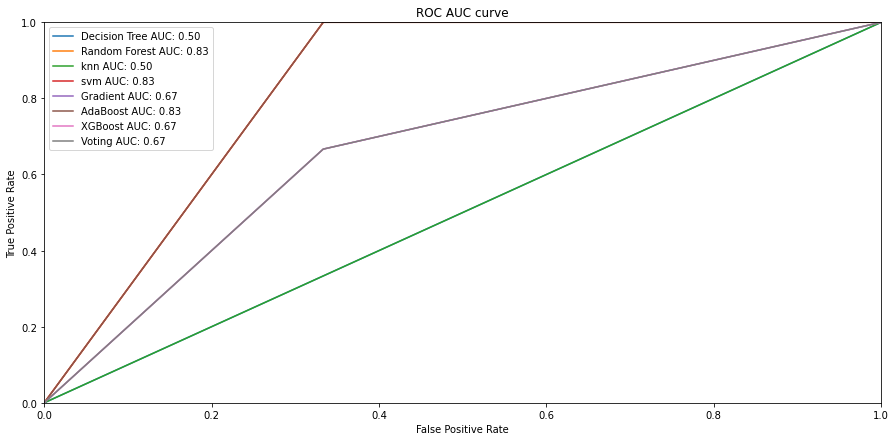

,model,accuracy,f1_score,sensitivity,specificity,ROC
0,Decision Tree,0.50,0.40,0.33,0.67,0.50
1,Random Forest,0.83,0.86,1.00,0.67,0.83
2,knn,0.50,0.40,0.33,0.67,0.50
3,svm,0.83,0.86,1.00,0.67,0.83
4,Gradientb,0.67,0.67,0.67,0.67,0.67
5,Adaboost,0.83,0.86,1.00,0.67,0.83
6,XGBoost,0.67,0.67,0.67,0.67,0.67
7,Voting,0.67,0.67,0.67,0.67,0.67


In [49]:
# getting results
result = get_results(model, validationx, validationy)
result


In [50]:
best_model = model[3]
predict = best_model.predict(test_new)



In [51]:
# saving output file
create_submission(predict, 'submission.csv')
